In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv("HospitalAdmissionsData.csv")

In [5]:
# A LIST OF FEATURES
print(list(df.columns))

['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type', 'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1', 'Race', 'Dx']


In [2]:
# How many features are floats? How many are integers? / Which features are objects (non-numeric variables)?
float_count = 0
int_count = 0
for item in list(df.columns):
    print(item, ": ", type(df.loc[0,item]))
# 4 INTS, 1 FLOAT
# FIELDS THAT ARE OBJECTS, ADMISSION TYPE / INSURANCE_TYPE / RELIGION TYPE / RACE / Dx

ID :  <class 'numpy.int64'>
AdmissionLengthDays :  <class 'numpy.float64'>
Death_1 :  <class 'numpy.int64'>
Admission_Type :  <class 'str'>
Insurance_Type :  <class 'str'>
EnglishLanguage_1 :  <class 'numpy.int64'>
Religion_Type :  <class 'str'>
Married_1 :  <class 'numpy.int64'>
Race :  <class 'str'>
Dx :  <class 'str'>


In [3]:
# What are the possible 'values' for insurance type?
print(list(df["Insurance_Type"].unique()))

['private', 'medicare', 'government', 'medicaid', 'self pay']


In [4]:
# Show the summary statistics for the admission length.
df.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [27]:
# What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
df.groupby('Admission_Type').count().idxmax() # Emergency
df.groupby('Insurance_Type').count().idxmax() # Medicare
df.groupby('Religion_Type').count().idxmax() # Catholic
df.groupby('Race').count().idxmax() # White
df.groupby('Dx').count().idxmax() # newborn

ID                     newborn
AdmissionLengthDays    newborn
Death_1                newborn
Admission_Type         newborn
Insurance_Type         newborn
EnglishLanguage_1      newborn
Religion_Type          newborn
Married_1              newborn
Race                   newborn
dtype: object

Text(0, 0.5, 'Frequency (# of people)')

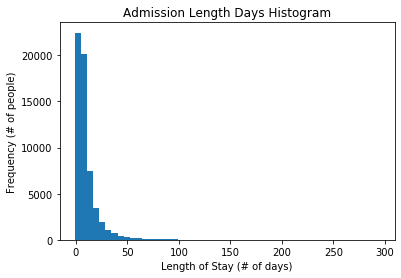

In [35]:
'''Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.'''

ax = df['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50)
ax.set_title("Admission Length Days Histogram")
ax.set_xlabel("Length of Stay (# of days)")
ax.set_ylabel("Frequency (# of people)")

Text(0, 0.5, 'Frequency (# of people)')

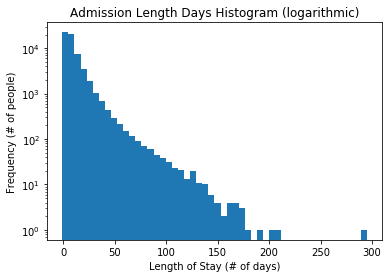

In [36]:
'''Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.'''

ax = df['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)
ax.set_title("Admission Length Days Histogram (logarithmic)")
ax.set_xlabel("Length of Stay (# of days)")
ax.set_ylabel("Frequency (# of people)")

## Observations
The length of stay is very clearly logarithmic in nature, meaning the longer the stay, there is an exponentially smaller amout of people who are staying in the hospital

In [40]:
print("Summary stats for those who died in hospital")
print(df[df["Death_1"] == 1]['AdmissionLengthDays'].describe())
print("Summary stats for those who survived in hospital")
print(df[df["Death_1"] == 0]['AdmissionLengthDays'].describe())

Summary stats for those who died in hospital
count    5852.000000
mean       10.129606
std        13.930116
min        -0.945139
25%         1.844444
50%         5.823264
75%        12.948437
max       206.425694
Name: AdmissionLengthDays, dtype: float64
Summary stats for those who survived in hospital
count    53011.000000
mean        10.140012
std         12.293398
min         -0.479167
25%          3.864583
50%          6.561111
75%         11.716667
max        294.660417
Name: AdmissionLengthDays, dtype: float64


Text(0, 0.5, 'Frequency (# of people)')

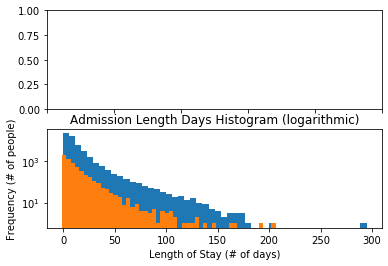

In [54]:
''' Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc. '''

fig, ax = plt.subplots(2)
ax[0] = df[df["Death_1"] == 0]['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)
ax[1] = df[df["Death_1"] == 1]['AdmissionLengthDays'].plot(kind="hist", sharex=True,sharey=True, bins=50, log=True)
# ax.append(df[df["Death_1"] == 1]['AdmissionLengthDays'].plot(subplots=True, kind="hist", sharex=True,sharey=True, bins=50, log=True))
ax[0].set_title("Admission Length Days Histogram (logarithmic)")
ax[0].set_xlabel("Length of Stay (# of days)")
ax[0].set_ylabel("Frequency (# of people)")

In [58]:
df.groupby("Insurance_Type")["Death_1"]